## Machine Predictive Maintenance
## Capstone Two - Step Two: EDA

This project aims to analyze the correlation between machine failure modes and multiple variables. The machine failure consists of five independent failure modes, while 14 features will be analyzed as variations, including temperatures, rotational speed, etc. The dataset can be obtained through the following link:

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In the previous project (Capstone Two: Data Wrangling), I conducted data cleaning and addressed missing values. In this project, my focus will be on investigating the relationships between features and their connection to the response variable through data visualization and statistical analysis.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the updated data from the previous project, Capstone Two: Data Wrangling.
data = pd.read_csv('SavedData/data01.csv')

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
# Display summary statistics of the dataset
data.describe()

,UID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.03570,0.004600,0.011500,0.009500,0.009800,0.002800
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.18555,0.067671,0.106625,0.097009,0.098514,0.052844
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Outliers

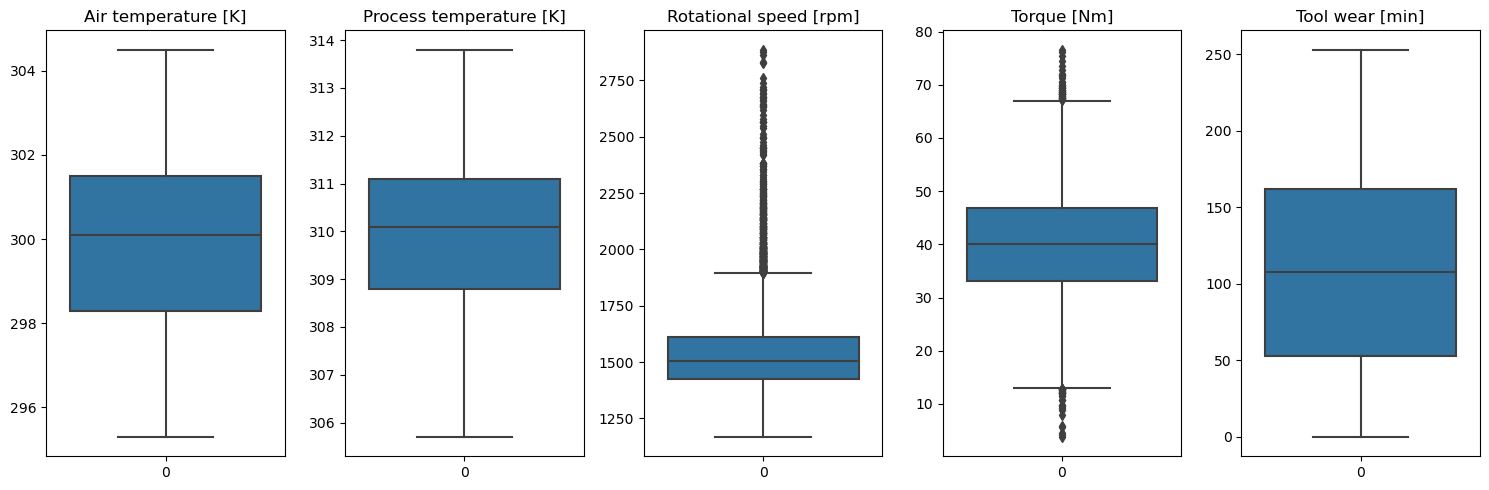

In [5]:
# List of columns to create box plots for
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create subplots for each column
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate through columns and create box plots
for i, column in enumerate(columns):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Since every data point is recorded by machine, I won't treat any of them as outliers.

### Dependent Variable

In [6]:
data.head()

,UID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


The dependent variable in this analysis is 'Machine failure'. This variable represents the overall failure status of the machine and takes a binary value: True or False. It captures the occurrence of at least one of the five single failure modes, namely 'TWF', 'HDF', 'PWF', 'OSF', and 'RNF'. When any of these single failure modes is True, the 'Machine failure' variable is also marked as True, indicating a machine failure event.

It's important to note that I won't include these five single failure modes (TWF, HDF, PWF, OSF, RNF) as independent variables in the model. This decision is based on the clarity of their relationship with the 'Machine failure' variable. Since these single failure modes are categorical and explicitly define whether a machine failure occurs, there's no need to explicitly include them as continuous independent variables in the analysis.

In [7]:
data['Machine failure'].value_counts()

Machine failure
0    9643
1     357
Name: count, dtype: int64

There are 357 failures among 10000 records.

### Independent Variables

'UDI' (Unique Identifier): Ranges from 1 to 10000 and serves as the chronological order for the produced products.

'Tool wear [min]': This variable represents the time-related aspect of the process. The "Type" variants H/M/L add 5/3/2 minutes of tool wear to the used tool, which is crucial for predicting machine failure.

'Type': This variable indicates the product quality variants and is represented by L, M, or H. It accounts for low (50% of all products), medium (30%), and high (20%) quality variants.

Text(0, 0.5, 'Tool Wear [min]')

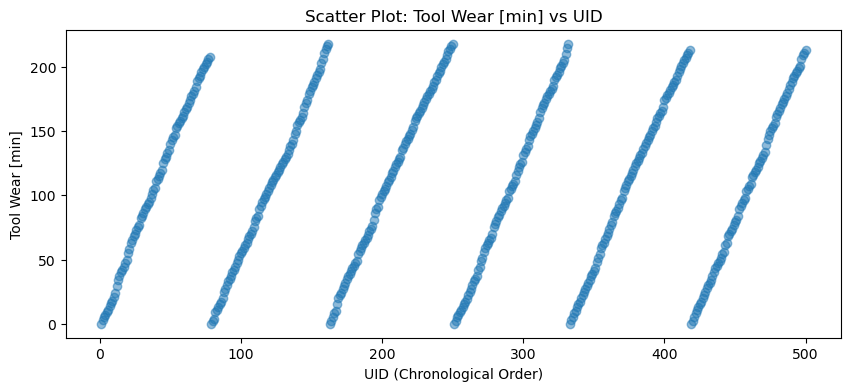

In [8]:
# Figure out the relationship between two time-related variables, UDI and 'Tool wear[min]'.

plt.figure(figsize=(10, 4))

# Scatter Plot
plt.scatter(data['UID'][0:500], data['Tool wear [min]'][0:500], alpha=0.5)
plt.title('Scatter Plot: Tool Wear [min] vs UID')
plt.xlabel('UID (Chronological Order)')
plt.ylabel('Tool Wear [min]')

After analyzing the scatter plot of the first 500 data points, it becomes evident that 'Tool wear [min]' is periodically reset to '0' when it reaches approximately 220 minutes. This pattern suggests that the tool is changed after a specific usage time, around 220 minutes. Consequently, I've decided to include 'Tool wear [min]' as one of the independent variables in the analysis, while using 'UID' solely as the index for the data frame. I've also chosen to include 'Type' as an independent variable, although it has been used to calculate 'Tool wear [min]'

Based on these considerations, I have selected the following six independent variables for the analysis: 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', and 'Tool wear [min]'. These variables capture a range of operational parameters and the cumulative wear on the tool, which I believe will be valuable in predicting machine failure.

### Visualizing correlations

In [9]:
# Update the data frame with dependent and independent columns only.

df = data[['Machine failure', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
df.set_index(data['UID'], inplace=True)

In [10]:
df.head()

,Machine failure,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UID,,,,,,,
1,0,M,298.1,308.6,1551,42.8,0
2,0,L,298.2,308.7,1408,46.3,3
3,0,L,298.1,308.5,1498,49.4,5
4,0,L,298.2,308.6,1433,39.5,7
5,0,L,298.2,308.7,1408,40.0,9


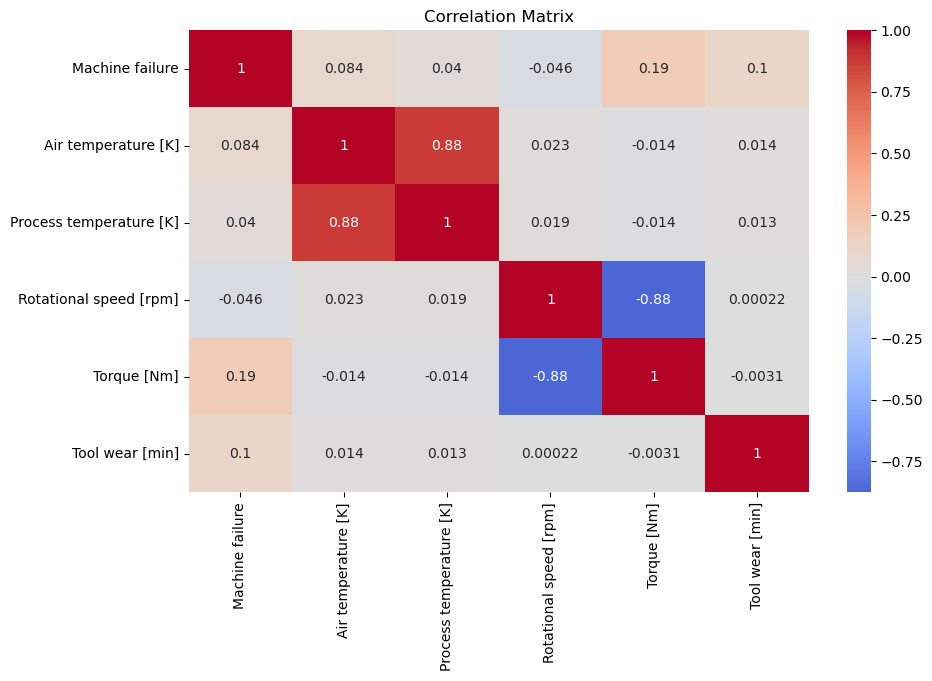

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

I've observed strong correlations within the dataset, particularly between 'Air temperature' and 'Process temperature', as well as between 'Rotational speed' and 'Torque'. These correlations align with the physical relationships we'd expect: when the process temperature increases, the air temperature tends to rise as well. Similarly, higher rotational speed typically corresponds to increased torque.

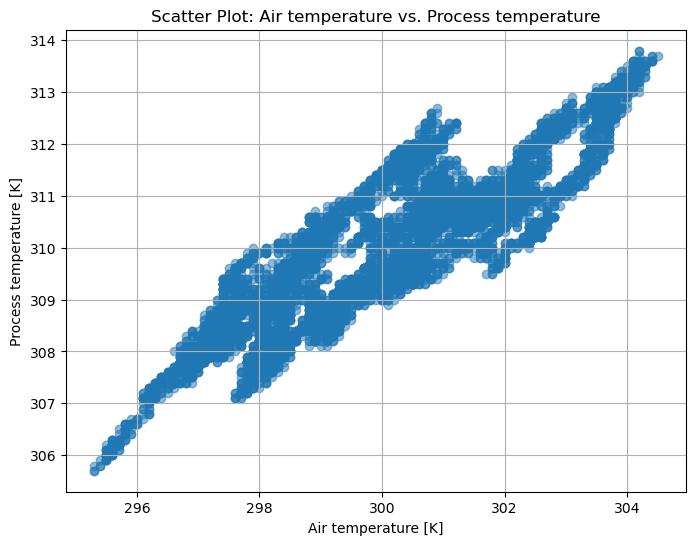

In [12]:
# Plot the relationship between two temperature features

x = data['Air temperature [K]']
y = data['Process temperature [K]']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot: Air temperature vs. Process temperature')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.grid(True)
plt.show()

The plot reveals that 'Process temperature' and 'Air temperature' have a strong liner relationship and 'Process temperature' consistently exceeds 'Air temperature' across all machine records. This suggests that changes in 'Process temperature' drive the variations observed in 'Air temperature'. To address multicollinearity, I have chosen 'Process temperature' as an independent variable, while dropping 'Air temperature'.

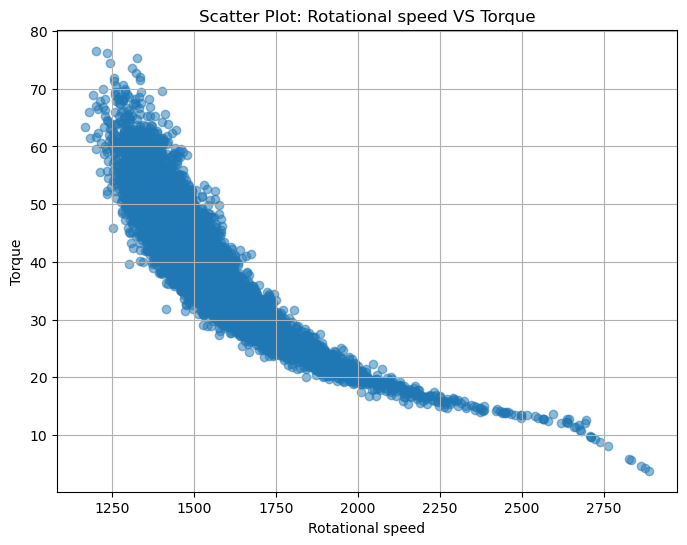

In [13]:
# Plot the relationship between 'Rotational speed [rpm]' and 'Torque [Nm]'

x = df['Rotational speed [rpm]']
y = df['Torque [Nm]']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot: Rotational speed VS Torque')
plt.xlabel('Rotational speed')
plt.ylabel('Torque')
plt.grid(True)
plt.show()

The plot indicates that 'Rotational speed [rpm]' and 'Torque [Nm]' are closely related, but the relationship is a bit more complicated than the temperature features. I've chosen to include 'Rotational speed [rpm]' as a feature for our model and decided to leave out 'Torque [Nm]'.

In [14]:
# Update the data frame by dropping 'Air temperature' and 'Torque [Nm]''
df = df[['Machine failure', 'Type', 'Process temperature [K]', 'Tool wear [min]', 'Rotational speed [rpm]']]
df.head()

,Machine failure,Type,Process temperature [K],Tool wear [min],Rotational speed [rpm]
UID,,,,,
1,0,M,308.6,0,1551
2,0,L,308.7,3,1408
3,0,L,308.5,5,1498
4,0,L,308.6,7,1433
5,0,L,308.7,9,1408


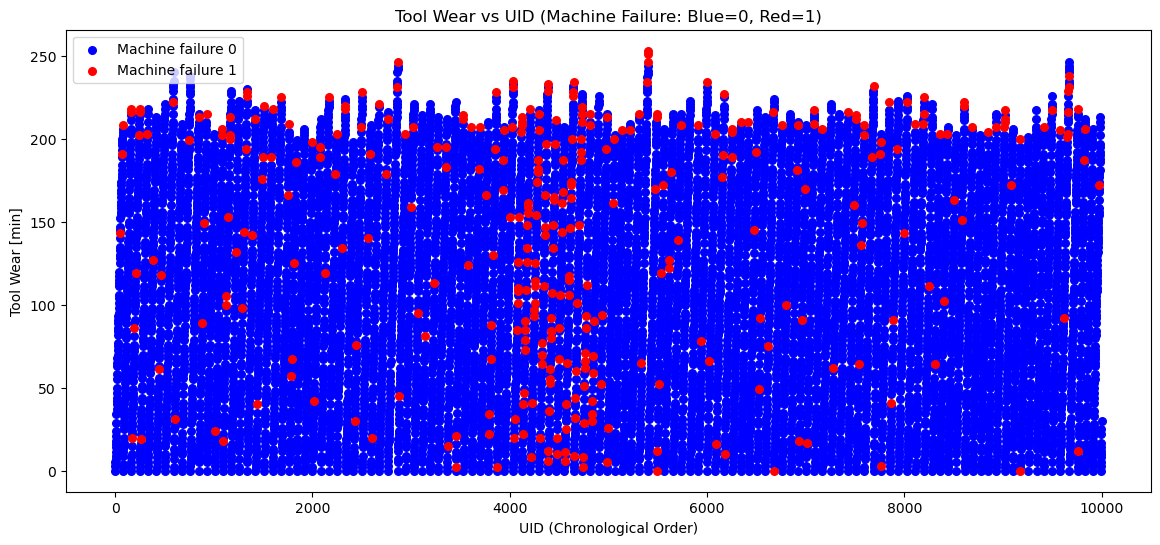

In [15]:
# Plot the relationship between 'UID' (Chronological Order), 'Tool Wear [min]', and 'Machine Failure'

# Scatter plot
plt.figure(figsize=(14, 6))

# Plot points where 'Machine failure' is 0 (blue)
plt.scatter(df.index[df['Machine failure'] == 0], df[df['Machine failure'] == 0]['Tool wear [min]'], color='blue', label='Machine failure 0',s=30)

# Plot points where 'Machine failure' is 1 (red)
plt.scatter(df.index[df['Machine failure'] == 1], df[df['Machine failure'] == 1]['Tool wear [min]'], color='red', label='Machine failure 1',s=30)

# Set labels and title
plt.xlabel('UID (Chronological Order)')
plt.ylabel('Tool Wear [min]')
plt.title('Tool Wear vs UID (Machine Failure: Blue=0, Red=1)')
plt.legend()

# Show the plot
plt.show()

From the plot, we can see two important things:

1. More Failures Before Changing Tools: There are more machine failures before the tools are replaced. This tells us that machines tend to break down more often just before it's time to change the tool. This is an essential pattern to consider when planning maintenance to avoid these failures.

2. Failures During UDI 4000 to 5000: We also notice that there's a higher number of failures between UDI 4000 and 5000. UDI is like a count of the products made, and this range indicates that machines are more likely to fail during this part of production. This gives us a hint about when to pay extra attention to prevent breakdowns.

Understanding these patterns helps us focus on specific times when the machines are more prone to failures, which is valuable for maintaining the equipment effectively and reducing downtime.

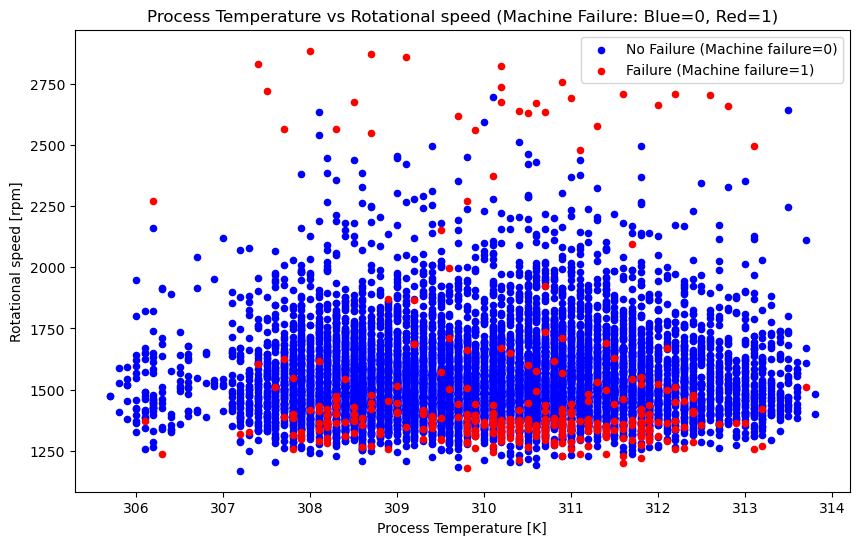

In [16]:
# Plot the relationship between 'Process temperature [K]', 'Rotational speed [rpm]' and 'Machine Failure'

# Scatter plot with color coding for 'Machine Failure'
plt.figure(figsize=(10, 6))

# Plot points where 'Machine failure' is 0 (blue) and 1 (red)
plt.scatter(df[df['Machine failure'] == 0]['Process temperature [K]'], 
            df[df['Machine failure'] == 0]['Rotational speed [rpm]'], 
            color='blue', label='No Failure (Machine failure=0)',s=20)
plt.scatter(df[df['Machine failure'] == 1]['Process temperature [K]'], 
            df[df['Machine failure'] == 1]['Rotational speed [rpm]'], 
            color='red', label='Failure (Machine failure=1)', s=20)

# Set labels and title
plt.xlabel('Process Temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Process Temperature vs Rotational speed (Machine Failure: Blue=0, Red=1)')
plt.legend()

# Show the plot
plt.show()

From the plot, we can see two important things:

1. Frequent Failures at Rotational Speeds (1250 to 1500): The plot shows that the machine fails more often when the speed it's spinning at is between 1250 and 1500. This suggests that something about this speed range might be causing the failures. It's crucial to understand why this happens to find ways to prevent these failures.

2. Very High Failures at High Rotational Speeds (> 2000): We also notice that when the machine spins faster than 2000, the failures happen a lot more. This is a critical point because it means that when the machine goes beyond this speed, there's a significant risk of it breaking down. Investigating why this happens at higher speeds is essential to make sure the machine operates safely and reliably.

These discoveries help us pinpoint specific speed ranges where the machine is more likely to fail. Understanding these patterns allows us to plan better maintenance and make adjustments to keep the machine running well, reducing unexpected downtimes.

In [17]:
df = df.rename(columns={'Process temperature [K]': 'Temperature', 'Rotational speed [rpm]': 'Rotationalspeed'})

In [18]:
df.to_csv('../MachinePredictiveMaintenance/SavedData/data02.csv', index=True)

## Summary:

We've focused on analyzing our machine data. We chose "Machine failure" as the thing to predict (dependent variable) and identified important factors like "Process temperature," "Rotational speed," and "Tool wear [min]" (independent variables). We used a heatmap to see how these factors relate to each other and created plots to understand their connection with "Machine failure." This helps us prepare for predictive models and better maintenance practices in the future.